# Visualization in Depth With Bokeh

The objectives of this lecture are:
- Describe how to create interactive visualizations using bokeh
- Study bokeh as a system
 - Function specification - what it provides programmers
 - Design (which has client and server parts)

## How to Learn a New System

Steps
- Find an example close to what you want
- Create an environment that runs the example
- Abstract the key concepts of how it works
- Transform the example into what you want

## Running Example - Biological Data

In [10]:
from bokeh.plotting import figure, output_file, show, output_notebook
import random
import numpy as np
import pandas as pd
output_notebook()

Loading BokehJS ...

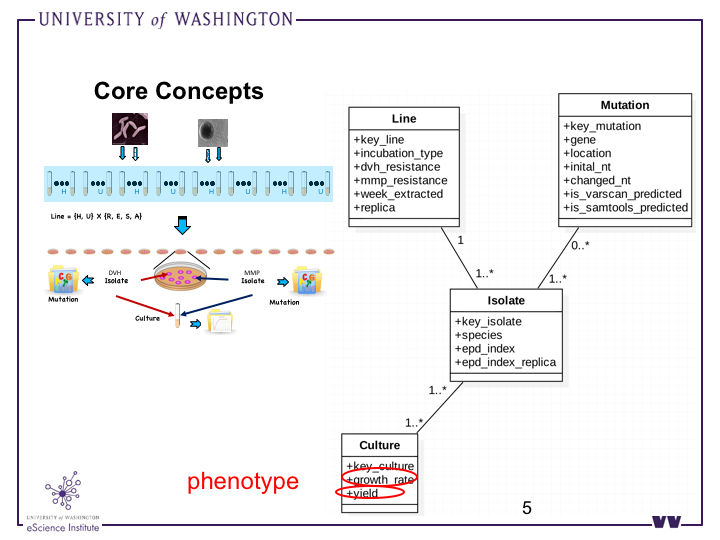

In [8]:
from IPython.display import Image
Image(filename='biological_data.png') 

In [12]:
df_bio = pd.read_csv("biological_data.csv")
df_bio.head()

,Unnamed: 0,culture,line,rate,yield
0,0,C0,HA,0.035581,0.531100
1,1,C1,HA,0.035072,0.528433
2,2,C2,HA,0.035883,0.534548
3,3,C217,HA,0.006110,0.025020
4,4,C218,HA,0.006510,0.024930


Desired visualization
- Scatterplot of rate vs. yield
- Hover shows the evolutionary "line"
- Widgets can specify color (and legend) for values of line

## Step 1: Find something close

In [18]:
plot = figure(plot_width=700, plot_height=800)
plot.circle(df_bio['rate'], df_bio['yield'])
show(plot)

### Bokeh tools

### Adding a Hover Tool

### Bokeh Concepts

For details on bokeh, see http://bokeh.pydata.org/en/latest/docs/user_guide.html#userguide

In [1]:
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p, notebook_handle=True)

In [3]:
from bokeh.plotting import figure, show, output_file

output_file('rectangles.html')

p = figure(plot_width=400, plot_height=400)
p.quad(top=[2, 3, 4], bottom=[1, 2, 3], left=[1, 2, 3],
       right=[1.2, 2.5, 8.7], color="#B3DE69")

show(p)

In [4]:
from bokeh.plotting import figure, output_file, show

output_file("patch.html")

p = figure(plot_width=400, plot_height=400)

# add a patch renderer with an alpha an line width
#p.patch([1, 2, 3, 4, 5], [6, 7, 8, 7, 3], alpha=0.5, line_width=2)
# Multiple patches
p.patches([[1, 3, 2], [3, 4, 6, 6]], [[2, 1, 4], [4, 7, 8, 5]],
          color=["firebrick", "navy"], alpha=[0.8, 0.3], line_width=2)

show(p)

In [5]:
from bokeh.plotting import figure, show

p = figure(plot_width=400, plot_height=400)
p.segment(x0=[1, 2, 3], y0=[1, 2, 3], x1=[1.2, 2.4, 3.1],
          y1=[1.2, 2.5, 3.7], color="#F4A582", line_width=3)

show(p)

In [6]:
import numpy as np
from matplotlib.mlab import bivariate_normal

from bokeh.plotting import figure, output_file, show
from bokeh.models import LogColorMapper, LogTicker, ColorBar

output_file('color_bar.html')

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
image = Z1 * 1e6

color_mapper = LogColorMapper(palette="Viridis256", low=1, high=1e7)

plot = figure(x_range=(0,1), y_range=(0,1), toolbar_location=None)
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[1.0], x=[0], y=[0])

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

plot.add_layout(color_bar, 'right')

show(plot)

In [7]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead

output_file("arrow.html", title="arrow.py example")

p = figure(plot_width=600, plot_height=600)

p.circle(x=[0, 1, 0.5], y=[0, 0, 0.7], radius=0.1,
         color=["navy", "yellow", "red"], fill_alpha=0.1)

p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=4),
                   x_start=0, y_start=0, x_end=1, y_end=0))

p.add_layout(Arrow(end=NormalHead(fill_color="orange"),
                   x_start=1, y_start=0, x_end=0.5, y_end=0.7))

p.add_layout(Arrow(end=VeeHead(size=35), line_color="red",
                   x_start=0.5, y_start=0.7, x_end=0, y_end=0))

show(p)



In [8]:
from bokeh.sampledata.glucose import data
from bokeh.plotting import figure, show, output_file
from bokeh.models import BoxAnnotation

output_file("box_annotation.html", title="box_annotation.py example")

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

#reduce data size
data = data.ix['2010-10-06':'2010-10-13']

p = figure(x_axis_type="datetime", tools=TOOLS)

p.line(data.index.to_series(), data['glucose'], line_color="gray", line_width=1, legend="glucose")

low_box = BoxAnnotation(top=80, fill_alpha=0.1, fill_color='red')
mid_box = BoxAnnotation(bottom=80, top=180, fill_alpha=0.1, fill_color='green')
high_box = BoxAnnotation(bottom=180, fill_alpha=0.1, fill_color='red')

p.add_layout(low_box)
p.add_layout(mid_box)
p.add_layout(high_box)

p.title.text = "Glucose Range"
p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

show(p)



RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

output_file("label.html", title="label.py example")

source = ColumnDataSource(data=dict(height=[66, 71, 72, 68, 58, 62],
                                    weight=[165, 189, 220, 141, 260, 174],
                                    names=['Mark', 'Amir', 'Matt', 'Greg',
                                           'Owen', 'Juan']))

p = figure(title='Dist. of 10th Grade Students at Lee High',
           x_range=Range1d(140, 275))
p.scatter(x='weight', y='height', size=8, source=source)
p.xaxis[0].axis_label = 'Weight (lbs)'
p.yaxis[0].axis_label = 'Height (in)'

labels = LabelSet(x='weight', y='height', text='names', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

citation = Label(x=70, y=70, x_units='screen', y_units='screen',
                 text='Collected by Luke C. 2016-04-01', render_mode='css',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)

p.add_layout(labels)
p.add_layout(citation)

show(p)

In [ ]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("toolbar.html")

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [ ]:
# Example of bokeh table widget
from os.path import dirname, join

import pandas as pd

from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.widgets import Slider, Button, DataTable, TableColumn, NumberFormatter
from bokeh.io import curdoc

df = pd.read_csv('salary_data.csv')

source = ColumnDataSource(data=dict())

def update():
    current = df[df['salary'] <= slider.value].dropna()
    source.data = {
        'name'             : current.name,
        'salary'           : current.salary,
        'years_experience' : current.years_experience,
    }

slider = Slider(title="Max Salary", start=10000, end=250000, value=150000, step=1000)
slider.on_change('value', lambda attr, old, new: update())

button = Button(label="Download", button_type="success")
button.callback = CustomJS(args=dict(source=source),
                           code=open( "download.js").read())

columns = [
    TableColumn(field="name", title="Employee Name"),
    TableColumn(field="salary", title="Income", formatter=NumberFormatter(format="$0,0.00")),
    TableColumn(field="years_experience", title="Experience (years)")
]

data_table = DataTable(source=source, columns=columns, width=800)

controls = widgetbox(slider, button)
table = widgetbox(data_table)

curdoc().add_root(row(controls, table))
curdoc().title = "Export CSV"

update()

Running a bokeh server http://bokeh.pydata.org/en/latest/docs/user_guide/server.html#userguide-server